## Merged df EDA

#### import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('../merged_df/merged_df.csv', sep=",", index_col=0)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40600 entries, 0 to 40599
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    40600 non-null  object 
 1   softTitle              40600 non-null  object 
 2   title                  40600 non-null  object 
 3   date                   40600 non-null  object 
 4   author                 40600 non-null  object 
 5   description            40600 non-null  object 
 6   keywords               40600 non-null  object 
 7   text                   40600 non-null  object 
 8   Article Length         40600 non-null  float64
 9   Stock                  40600 non-null  object 
 10  Open                   40600 non-null  float64
 11  Low                    40600 non-null  float64
 12  Close                  40600 non-null  float64
 13  Adjusted_Close         40600 non-null  float64
 14  Volume                 40600 non-null  float64
 15  Month  

In [4]:
# Summary statistics for numerical columns
print(df.describe())

       Article Length          Open           Low         Close  \
count    40600.000000  40600.000000  40600.000000  40600.000000   
mean       613.396552    162.768787    158.258489    160.619203   
std        433.239584     85.422391     82.977000     84.235778   
min        151.000000     10.652667      9.403333      9.883333   
25%        313.750000    102.989998    100.077499    101.777496   
50%        526.000000    145.570007    141.809998    143.899994   
75%        781.000000    217.250000    209.750000    213.932499   
max       5369.000000    414.496674    405.666656    409.970001   

       Adjusted_Close        Volume         Month  Price_Change_Pct  \
count    40600.000000  4.060000e+04  40600.000000      40600.000000   
mean       159.624894  7.019408e+07      6.930172          0.212111   
std         83.853964  5.657826e+07      3.471804          2.564889   
min          9.883333  6.936000e+06      1.000000        -21.062824   
25%        101.279999  2.900550e+07      

In [5]:
# Check for missing values
print(df.isnull().sum())

url                      0
softTitle                0
title                    0
date                     0
author                   0
description              0
keywords                 0
text                     0
Article Length           0
Stock                    0
Open                     0
Low                      0
Close                    0
Adjusted_Close           0
Volume                   0
Month                    0
Price_Change_Pct         0
Adjusted_Close_Change    0
dtype: int64


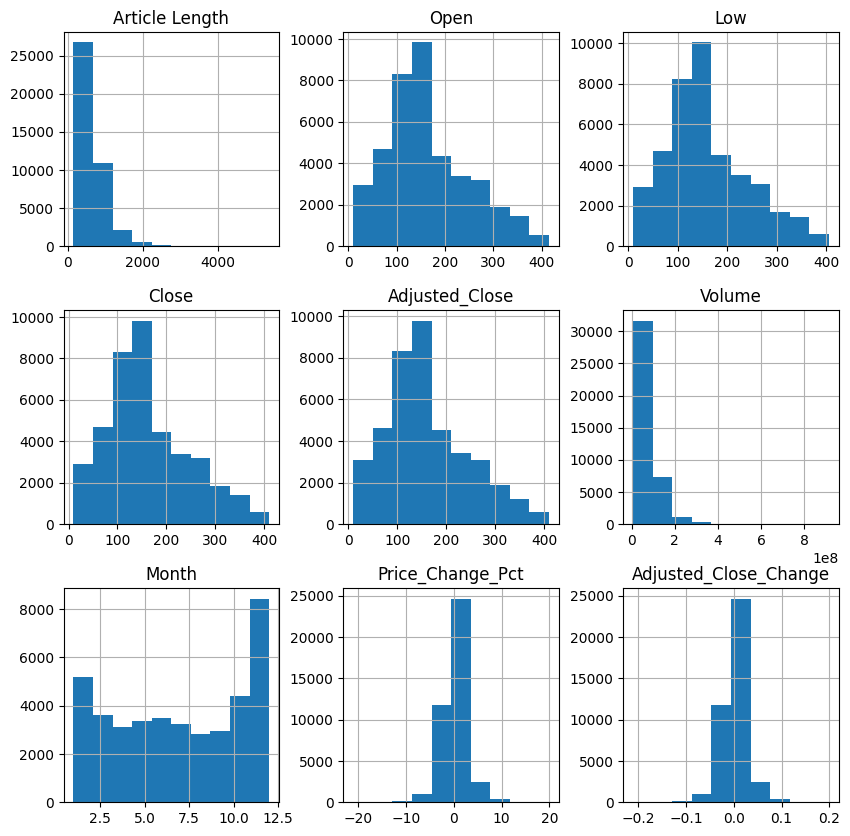

In [6]:
# Histograms for numerical columns
df.hist(figsize=(10, 10))
plt.show()

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


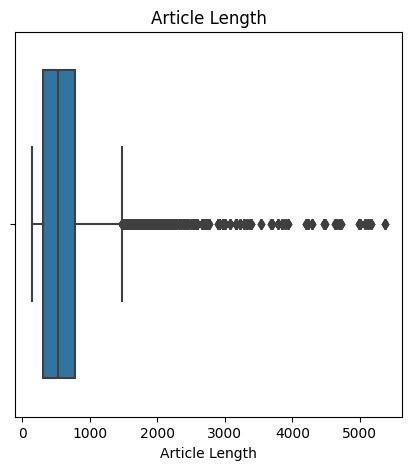

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


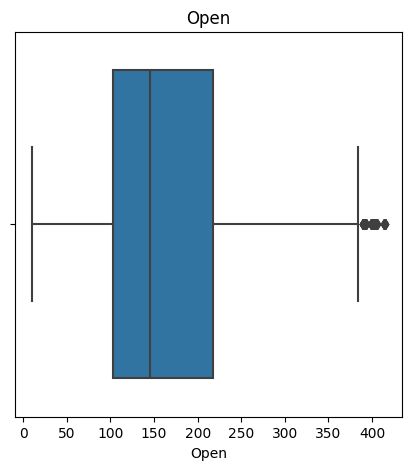

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


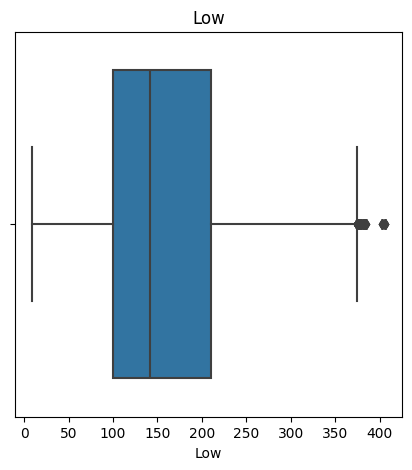

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


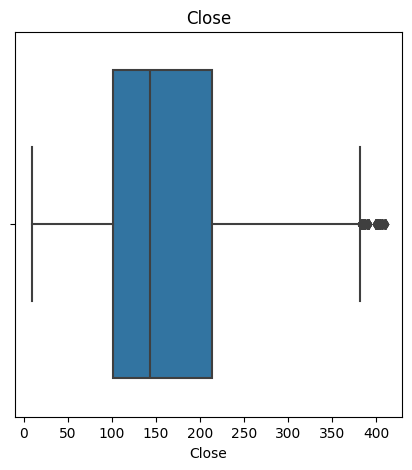

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


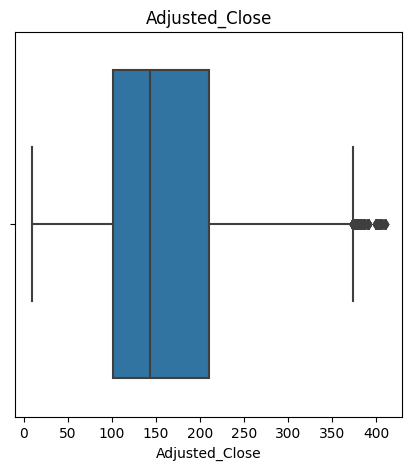

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


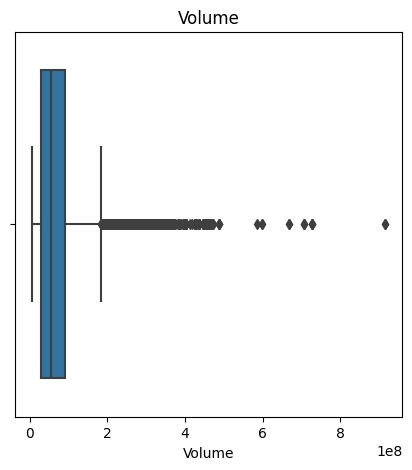

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


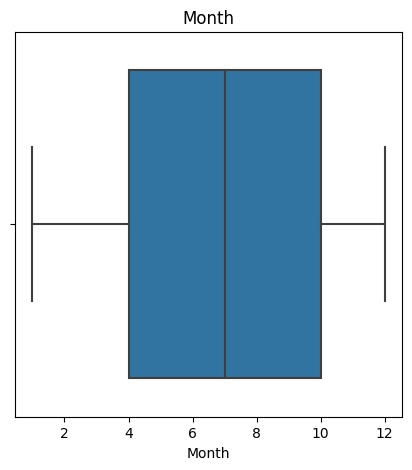

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


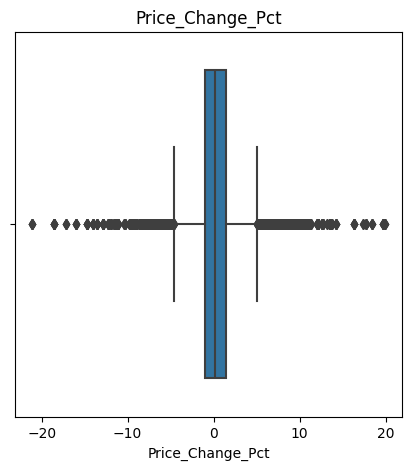

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


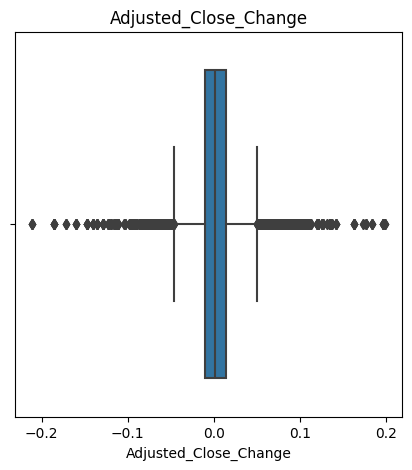

In [7]:
# Box plots for numerical columns to identify outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()


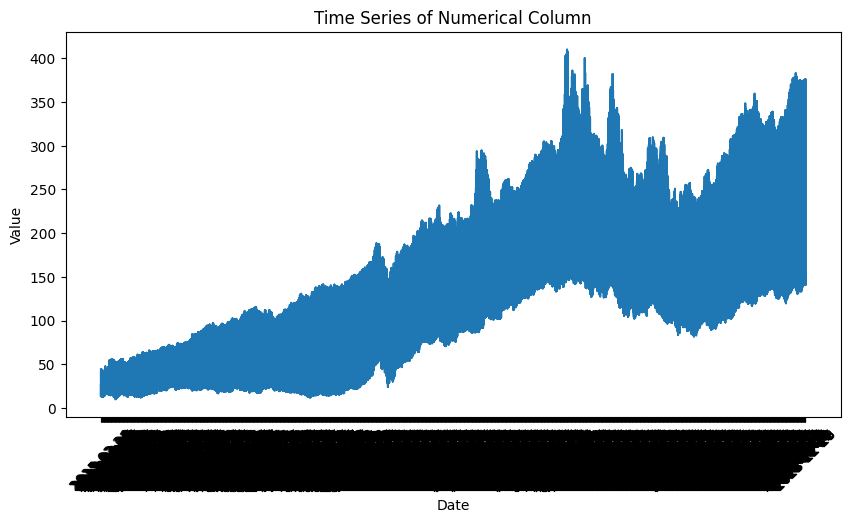

In [8]:
# Time series plot example for a datetime and a numerical column
# Replace 'datetime_column' and 'numerical_column' with actual column names

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Close'])
plt.title('Time Series of Numerical Column')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



In [9]:
# Word Cloud for a textual column
# Replace 'text_column' with your actual text column name
text = " ".join(review for review in df.text.dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



KeyboardInterrupt: 

In [ ]:
# Select only the numerical columns from the DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])

corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Article Length,Compound Score,Sentiment Score,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
Article Length,1.000000,0.031883,0.040111,0.013919,0.013901,0.014016,0.013868,0.005160,0.028637,0.003472,0.003475
Compound Score,0.031883,1.000000,0.363531,-0.036222,-0.035854,-0.036249,-0.036975,0.021072,-0.002159,0.000698,0.000762
Sentiment Score,0.040111,0.363531,1.000000,-0.015884,-0.014391,-0.015384,-0.015808,-0.002977,0.031157,0.000669,0.000658
Open,0.013919,-0.036222,-0.015884,1.000000,0.999248,0.999501,0.999372,-0.213989,0.141105,-0.013501,-0.013261
Low,0.013901,-0.035854,-0.014391,0.999248,1.000000,0.999505,0.999218,-0.231874,0.146772,-0.012946,-0.012695
Close,0.014016,-0.036249,-0.015384,0.999501,0.999505,1.000000,0.999790,-0.222128,0.143455,0.002828,0.003073
Adjusted_Close,0.013868,-0.036975,-0.015808,0.999372,0.999218,0.999790,1.000000,-0.219002,0.146052,0.002796,0.003034
Volume,0.005160,0.021072,-0.002977,-0.213989,-0.231874,-0.222128,-0.219002,1.000000,-0.134723,0.059001,0.058896
Month,0.028637,-0.002159,0.031157,0.141105,0.146772,0.143455,0.146052,-0.134723,1.000000,-0.034252,-0.034184
Price_Change_Pct,0.003472,0.000698,0.000669,-0.013501,-0.012946,0.002828,0.002796,0.059001,-0.034252,1.000000,0.999977


In [ ]:
temp = df[['Sentiment Scores','Compound Score','Overall Sentiment','Price_Change_Pct','Volume','Close']]

In [ ]:
temp.describe()

,Compound Score,Price_Change_Pct,Volume,Close
count,43165.000000,43165.000000,4.316500e+04,43165.000000
mean,0.192748,0.209194,6.992488e+07,160.144975
std,0.421092,2.545126,5.628605e+07,84.589631
min,-0.942300,-21.062824,6.936000e+06,9.883333
25%,0.000000,-0.987215,2.888040e+07,100.830002
50%,0.184000,0.163697,5.494580e+07,143.406006
75%,0.526700,1.422688,9.095670e+07,213.100006
max,0.977600,19.894859,9.140820e+08,409.970001


In [ ]:
# Pairplot for a subset of numerical columns
# sns.pairplot(df[['numerical_column1', 'numerical_column2', 'numerical_column3']])
# plt.show()



In [ ]:
# Bar plot for a categorical column
# sns.countplot(y='categorical_column', data=df)
# plt.title('Distribution of Categories')
# plt.show()